# Lecture 2: Digital quantum simulation

## 2.1 The quantum circuit model

In these lecture notes, we use the terms **universal quantum computer** and the **quantum circuit model of computation** interchangeably. Quantum circuits form the foundation of quantum computation. They provide a visual and mathematical framework for representing quantum algorithms, analogous to classical logic circuits in classical computation. 

A **quantum circuit** consists of:
- **Wires**, each representing a qubit.
- **Gates**, each performing a specific unitary operation to manipulate the quantum state of the qubits.

It is depicted in a circuit diagram where:

- Horizontal lines represent qubits.
- Boxes or symbols along these lines represent quantum gates that apply specific operations.
- Time flows from left to right, illustrating the sequence of operations applied to the qubits (**opposite to the order in their mathematical expessions**).


We are going to use **IBM Qiskt 1.x**:

In [1]:
import qiskit
qiskit.__version__

'1.3.1'

In [2]:
from qiskit import *
from qiskit.visualization import *
from qiskit.quantum_info import Operator, Statevector
from qiskit.circuit import Parameter
import numpy as np

### 2.1.1 Quantum bits

**A quantum bit (qubit)** is a quantum system that has two orthonormal basis states, typically denoted as $|0\rangle$ and $|1\rangle$ in the computational basis. They are conventionally represented as vectors:

\begin{align}
    |0\rangle = \begin{pmatrix}
        1\\0
    \end{pmatrix}
    \qquad
    \text{and}
    \qquad
    |1\rangle = \begin{pmatrix}
        0\\1
    \end{pmatrix}.    
\end{align}

For $n$ qubits, the $2^n$ computational basis states can be constructed using the tensor product $\otimes$. **A quantum register** is a set of qubits used in quantum computation to store and manipulate quantum information. It is an extension of the concept of a classical register in a digital computer, which is a memory unit for storing classical bits. The bit on the left is called the **Most Significant Bit (MSB)**, while the bit on the right is known as the **Least Significant Bit (LSB)**. In the binary representation, a computational basis state is written as

\begin{align}
    |q_{n-1} q_{n-2}\cdots q_0\rangle \equiv |q_{n-1}\rangle \otimes |q_{n-2}\rangle \otimes \cdots \otimes |q_0\rangle
\end{align}

where $q_i$ takes values in $\{0, 1\}$, with $q_{n-1}$ and $q_0$ representing the MSB and LSB, respectively. This state is sometimes expressed in decimal form as $|m\rangle$ with 

$$
m=\sum\limits_{i=0}^{n-1} 2^i q_i,
$$

and is represented as a vector with its $(m+1)^{\text{th}}$ component equal to 1, while all the other components are 0. 

> In conventional textbooks like [Nielsen & Chuang, 2012](https://www.cambridge.org/9781107002173), the same state in decimal form has a different binary representation: $|j_1j_2\cdots j_{n}\rangle$.

According to the `Qiskit` convention, the MSB is positioned on **the lower bit in the circuit diagram**. For instance, in `Qiskit`, a circuit corresponding to an initial $n$-qubit state is created using:

```python
QuantumCircuit(q_0, q_1, \dots, q_{n-1})
```

where each `q_i` represents a `QuantumRegister` object. Here, `q_0` and `q_{n-1}` represent the LSB and MSB, respectively. In the circuit diagram, the wire corresponding to `q_0` appears at the top, while the wire for `q_{n-1}` is positioned at the bottom.

For example:

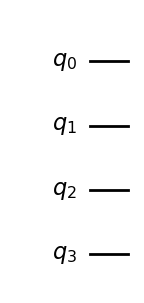

In [3]:
# Create a quantum circuit with 4 qubits
qc = QuantumCircuit(4)

# Visualize the circuit
qc.draw('mpl')

This corresponds to a state vector $|q_3q_2q_1q_0\rangle$.

**Tensor Product**

The tensor product can be implemented through the Kronecker product. Suppose $A$ is an $m \times n$ matrix, and $B$ is a $p \times q$ matrix. Then the matrix representation of their Kronecker product is given by:

\begin{align}
    A \otimes B = \begin{pmatrix}
        a_{11}B & a_{12}B & \cdots & a_{1n}B \\
        a_{21}B & a_{22}B & \cdots & a_{2n}B \\
        \vdots & \vdots & \ddots & \vdots \\
        a_{m1}B & a_{m2}B & \cdots & a_{mn}B
    \end{pmatrix}
\end{align}

where each element $a_{ij}$ of matrix $A$ is multiplied by the entire matrix $B$, forming a block matrix. In `numpy`, the Kronecker product can be computed using the function:

```python
numpy.kron(A, B)

### 2.1.2 Single-qubit gates

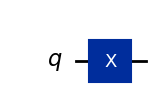

In [4]:
qc = QuantumCircuit(1,0)
qc.x(0)
x = qc.draw('mpl')
x

In [88]:
x.savefig('x.pdf')

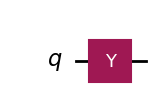

In [5]:
qc = QuantumCircuit(1,0)
qc.y(0)
y = qc.draw('mpl')
y

In [90]:
y.savefig('y.pdf')

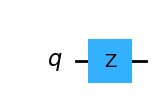

In [6]:
qc = QuantumCircuit(1,0)
qc.z(0)
z = qc.draw('mpl')
z

In [92]:
z.savefig('z.pdf')

In [11]:
Operator(qc).draw('latex')

<IPython.core.display.Latex object>

In [79]:
cnot.savefig('cnot.pdf')

\begin{align}
    R_x(\theta) & = e^{-\frac{i}{2}\theta X} =\cos\frac{\theta}{2}-i X \sin\frac{\theta}{2},\notag\\
    R_y(\theta) & = e^{-\frac{i}{2}\theta Y} =\cos\frac{\theta}{2}-i Y \sin\frac{\theta}{2},\notag\\
    R_z(\theta) & = e^{-\frac{i}{2}\theta Z} =\cos\frac{\theta}{2}-i Z \sin\frac{\theta}{2}.
    \end{align}

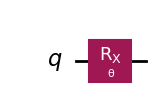

In [12]:
qc = QuantumCircuit(1)

# Define the rotation angle (theta)
theta = 1.57  # Example: pi/2 radians

# Apply the Rx rotation gate
θ = Parameter('θ')
qc.rx(θ, 0)
rx = qc.draw('mpl')
rx

In [12]:
rx.savefig('rx.pdf')

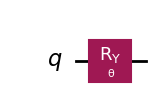

In [7]:
qc = QuantumCircuit(1)

# Define the rotation angle (theta)
θ = Parameter('θ')
qc.ry(θ, 0)

# Visualize the circuit
ry = qc.draw('mpl')
ry

In [14]:
ry.savefig('ry.pdf')

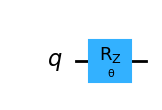

In [8]:
qc = QuantumCircuit(1)

# Define the rotation angle (theta)
θ = Parameter('θ')
qc.rz(θ, 0)

# Visualize the circuit
rz = qc.draw('mpl')
rz

In [10]:
rz_gate = Operator(qc.assign_parameters({θ: np.pi/2}))
rz_gate.draw('latex')

<IPython.core.display.Latex object>

In [11]:
theta = np.pi/2
np.cos(theta/2)*np.identity(2) - 1.0j*np.sin(theta/2)*np.array([[1.0, 0.0], [0.0, -1.0]])-rz_gate.data

array([[0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]])

In [16]:
rz.savefig('rz.pdf')

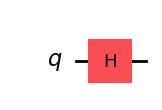

In [12]:
qc = QuantumCircuit(1)

qc.h(0)

h_gate = Operator(qc)
h = qc.draw('mpl')
h

In [29]:
h_gate.draw('latex')

<IPython.core.display.Latex object>

In [18]:
h.savefig('h.pdf')

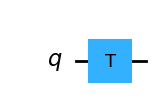

In [13]:
qc = QuantumCircuit(1)

# Define the rotation angle (theta)
theta = 1.57  # Example: pi/2 radians

# Apply the Rx rotation gate
qc.t(0)
t_gate = Operator(qc)

t = qc.draw('mpl')
t

In [33]:
t_gate.draw('latex')

<IPython.core.display.Latex object>

In [24]:
t.savefig('t.pdf')

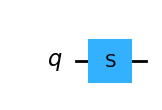

In [14]:
qc = QuantumCircuit(1)

# Define the rotation angle (theta)
theta = 1.57  # Example: pi/2 radians

# Apply the Rx rotation gate
qc.s(0)

s_gate = Operator(qc)
s = qc.draw('mpl')
s

In [35]:
s_gate.draw('latex')

<IPython.core.display.Latex object>

In [25]:
s.savefig('s.pdf')

Let us start with $|0\rangle$, and prepare a state using the rotation operators:
\begin{align}
    |\psi\rangle = R_z(\phi) R_y(\theta)|0\rangle = e^{-\frac{i}{2}\phi}[ \cos({\theta}/{2})|0\rangle + e^{i\phi}\sin{\theta}/{2}|1\rangle ],
\end{align}
which is indistinguishable from $|\psi\rangle=\cos({\theta}/{2})|0\rangle + e^{i\phi}\sin{\theta}/{2}|1\rangle$. Such a state can be conveniently represented as a point on the surface of a sphere with a radius of 1, known as the **Bloch sphere**. The polar angle, $\theta$, corresponds to the angle between the Bloch vector (which points from the origin to the point) and the $z$-axis, while the azimuthal angle, $\phi$, represents the angle between the projection of the Bloch vector onto the $x$-$y$ plane and the $x$-axis. The Bloch sphere for one qubit can be produced by the following code:


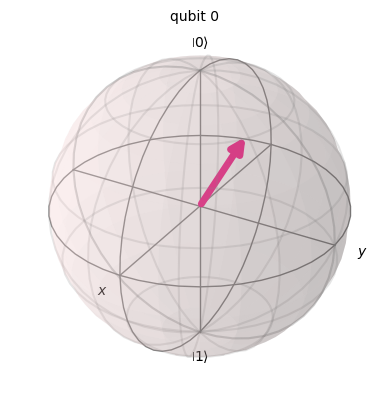

In [15]:
# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Apply gates to set the qubit's state (adjust these gates to experiment)
theta = np.pi/5
phi = np.pi/3
qc.ry(theta, 0)
qc.rz(phi, 0)

# Get the statevector of the qubit
state = Statevector.from_instruction(qc)

# Visualize the state on the Bloch sphere
bs = plot_bloch_multivector(state.data)
bs

### 2.1.3 Two-qubit gates

The **CNOT gate** is a critical operator in quantum computing. It operates on two input qubits, known as the **control qubit** and **target qubit**. Specifically, if the control qubit is in the state $|1\rangle$, the target qubit is flipped; otherwise, the target qubit remains unchanged. When the control qubit is the leftmost (MSB), the CNOT gate is represented as:
\begin{align}
\text{CNOT} = |0\rangle\langle0| \otimes \mathbb{1} + |1\rangle\langle1| \otimes X
\end{align}


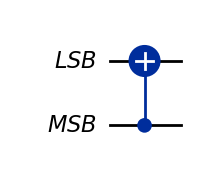

In [16]:
lsb, msb = QuantumRegister(1, 'LSB'), QuantumRegister(1, 'MSB')
qc = QuantumCircuit(lsb, msb)
qc.cx(msb, lsb)

cnot_gate = Operator(qc)
cnot = qc.draw('mpl')
cnot

In [38]:
cnot_gate.draw('latex')

<IPython.core.display.Latex object>

In [45]:
c0 = np.array([[1], [0]])
c1 = np.array([[0], [1]])
x = np.kron(c0, c1.T) + np.kron(c1, c0.T)

np.kron(np.kron(c0, c0.T), np.identity(2)) + np.kron(np.kron(c1, c1.T), x) - cnot_gate.data

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [ ]:
cnot.savefig('cnot.pdf')

If we need to specify the control ($i$) and target ($j$) qubits of a CNOT gate, we use the notation $(\text{C}_i\text{X}_j)$. This gate can be used to create entanglement between two qubits.

Similarly, one can defined **controlled-Z (CZ) gate**:

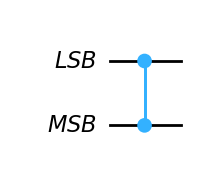

In [17]:
lsb, msb = QuantumRegister(1, 'LSB'), QuantumRegister(1, 'MSB')
qc = QuantumCircuit(lsb, msb)
qc.cz(msb, lsb)

cz_gate = Operator(qc)
cz = qc.draw('mpl')
cz

In [47]:
cz_gate.draw('latex')

<IPython.core.display.Latex object>

In [6]:
cz.savefig('cz.pdf')

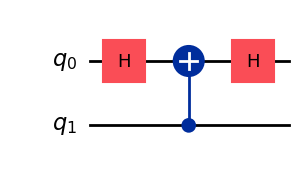

In [18]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(1, 0)
qc.h(0)
cz = qc.draw('mpl')
cz

In [19]:
Operator(qc).draw('latex')

<IPython.core.display.Latex object>

In [ ]:
cz.savefig('cz_from_cnot.pdf')

The **SWAP gate**:

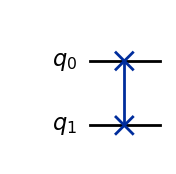

In [20]:
# Create a quantum circuit with two qubits
qc = QuantumCircuit(2)

# Apply the SWAP gate
qc.swap(0, 1)

# Extract and print the SWAP gate matrix
swap_matrix = Operator(qc)

# Visualize the circuit
swap = qc.draw('mpl')
swap

In [49]:
swap_matrix.draw('latex')

<IPython.core.display.Latex object>

In [9]:
swap.savefig('swap.pdf')

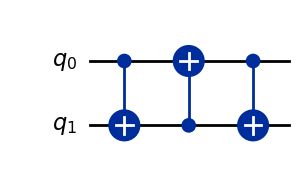

In [21]:
qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.cx(1, 0)
qc.cx(0, 1)
swap = qc.draw('mpl')
swap

In [22]:
Operator(qc).draw('latex')

<IPython.core.display.Latex object>

In [ ]:
swap.savefig('swap_from_cnot.pdf')

### 2.1.4 Measurement

Measurement is a fundamental concept in quantum computing, serving as the primary mechanism for extracting information from quantum systems. Unlike classical systems, where a system's state can be observed without alteration, quantum measurement is inherently probabilistic and inevitably affects the state being measured. Upon measurement, the wave function of a quantum system collapses into an eigenstate of the corresponding Hermitian operator, making measurement an irreversible operation.\footnote{Decoherence can be understood as the undesired interaction between a quantum system and its environment, effectively acting as an unintended measurement of the system's state.}

In more detail, one can identify **a complete set of commuting observables** (Hermitian operators), whose eigenstates, denoted as $|m\rangle$, form a complete basis for the system's Hilbert space. Specifically, this completeness is expressed as
\begin{equation}
    \sum\limits_m |m\rangle\langle m| = \mathbb{1}.
\end{equation}
After measurement, the state of the system collapses into one of these eigenstates, given by
\begin{equation}
    \frac{|m\rangle\langle m|\psi\rangle}{\sqrt{\langle\psi|m\rangle\langle m|\psi\rangle}},
\end{equation}
with a probability
\begin{equation}
    p(m) = \langle\psi|m\rangle\langle m|\psi\rangle.
\end{equation}
This is the **measurement postulate** of quantum mechanics.

A classical measurement in the computational basis on a qubit collapse its state into either $|0\rangle$ or $|1\rangle$. In this case, one has the completeness relation $|0\rangle\langle 0| + |1\rangle\langle 1| = \mathbb{1}$.  In circuit diagrams, this operation is represented by a meter symbol, commonly referred to as a **READOUT/measurement gate**. Note that a measurement of a single qubit in any basis can be achieved by performing a measurement in the computational basis, preceded and followed by appropriate unitary transformations.

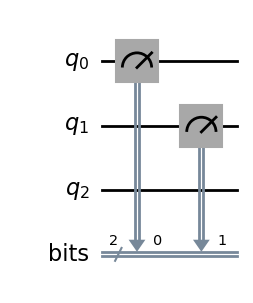

In [23]:
qbit, cbit = QuantumRegister(3, 'q'), ClassicalRegister(2, 'bits')
qc = QuantumCircuit(qbit, cbit)
qc.measure(qbit[:len(cbit)], cbit)
me = qc.draw('mpl')
me

In [ ]:
me.savefig('measure.pdf')

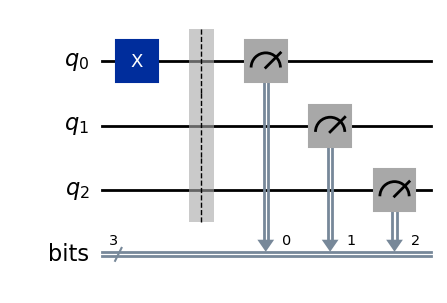

In [26]:
qbit, cbit = QuantumRegister(3, 'q'), ClassicalRegister(3, 'bits')
qc = QuantumCircuit(qbit, cbit)
qc.x(0)
qc.barrier()
qc.measure(qbit[:len(cbit)], cbit)
me = qc.draw('mpl')
me

In [24]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.primitives import StatevectorSampler

In [27]:
simulator = BasicSimulator()
sampler = StatevectorSampler()

probs = simulator.run(qc, shots=1).result()
print(probs.get_counts())

{'001': 1}


### 2.1.5 Universal Quantum Gates

A set of quantum gates is considered **universal** for quantum computation if it can be used to approximate any unitary operation to arbitrary accuracy. There are different universality constructions for quantum computing:

**Universality Theorem**

The set $\{R_x(\theta), R_y(\theta),R_z(\theta), CNOT\}$ is universal. In the worst case, the number of gates in the decomposition scales as $O(n^3 4^n)$ [ https://arxiv.org/abs/quant-ph/9503016 ].  It is worth noting that a decomposition requiring $O(4^n)$ CNOT gates was derived in [ https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.93.130502 ].

We outline the proof below:

#### Step 1: Two-level unitary gates are universal

Let us start with a $d \times d$ unitary matrix $A_d$, whose elements are denoted by $a_{ij}$. Find the smallest value of $j > 1$ such that $a_{j1} \neq 0$. This element can be set to zero by multiplying $A_d$ with a two-level unitary matrix given by:

$$
U^\dagger = 
\begin{pmatrix}
    \frac{a_{11}^*}{\sqrt{|a_{11}|^2 + |a_{j1}|^2}} & \mathbb{0} & \frac{a_{j1}^*}{\sqrt{|a_{11}|^2 + |a_{j1}|^2}} & \mathbb{0} \\
    \mathbb{0} & \mathbb{1}_{j-2} & \mathbb{0} & \mathbb{0} \\
    \frac{a_{j1}}{\sqrt{|a_{11}|^2 + |a_{j1}|^2}} & \mathbb{0} & \frac{-a_{11}}{\sqrt{|a_{11}|^2 + |a_{j1}|^2}} & \mathbb{0} \\
    \mathbb{0} & \mathbb{0} & \mathbb{0} & \mathbb{1}_{d-j}
\end{pmatrix},
$$

where $\mathbb{1}_d$ is the $d \times d$ identity matrix, and $\mathbb{0}$ denotes a matrix whose elements are all zero. 

In the worst-case scenario, $a_{j1} \neq 0$ for all $j$. By iteratively applying these transformations, one obtains:

$$
U^\dagger_{d-1} \cdots U^\dagger_{1} A_d = 
\begin{pmatrix}
    1 & \mathbb{0} \\
    \mathbb{0} & A_{d-1}
\end{pmatrix},
$$

where $A_{d-1}$ is a $(d-1) \times (d-1)$ unitary matrix. Repeating this process iteratively, we construct a sequence of $d(d-1)/2$ two-level unitary matrices:

$$
A_d = U_1 U_2 \cdots U_{d(d-1)/2}.
$$

In an $n$-qubit system, $d = 2^n$, leading to a decomposition requiring $2^{n-1}(2^n - 1)$ two-level unitary matrices.

#### Step 2: Single qubit and CNOT gates are universal

A two-level unitary matrix $U$ represents a rotation in a two-dimensional subspace spanned by basis states $|i\rangle$ and $|j\rangle$, where $j > i$:

$$
U = \mathbb{1} - (|i\rangle\langle i| + |j\rangle\langle j|) + \tilde{U},
$$

where $\tilde{U}$ is the non-trivial $2 \times 2$ submatrix acting on this subspace.

To construct a quantum circuit implementing $U$:

1. Rotate $|i\rangle$ to an intermediate state differing from $|j\rangle$ by one qubit.
2. Apply $\tilde{U}$ using controlled operations.
3. Rotate back to the original basis states.

A **Gray code** can be used to determine intermediate states efficiently \[Barenco:1995na\]. Since two binary numbers can be connected in at most $O(n)$ steps, this implies at most $O(n)$ controlled operations are needed to implement $U$. Each controlled single-qubit gate can be decomposed into $\{R_x(\theta), R_y(\theta), R_z(\theta)\}$ with $O(n^2)$ CNOT gates \[Barenco:1995na\]. More efficient decompositions exist [ https://arxiv.org/abs/0803.2316 ].

**The Solovay-Kitaev Theorem**

Any unitary operation can be approximated to arbitrary accuracy using the set \{H, T, CNOT\}.

The Hadamard and T gates approximate any single-qubit unitary operation. The **Solovay-Kitaev theorem** states that an arbitrary single-qubit gate can be approximated to accuracy $\epsilon$ using $O(\log^c(1/\epsilon))$ gates from this discrete set, where $c \approx 2$. This ensures that even high-precision operations require only a manageable number of gates.

In summary, **most unitary transformations cannot be implemented efficiently in general**, as they require an exponentially large number of operations: 

$$
O(4^n) = O(e^{2n \ln 2}).
$$


### 2.1.6 State preparation

Given a universal gate set that includes the CNOT gate, the complexity of quantum circuits is typically measured by the number of CNOT gates required due to the fact that the physical realization of CNOT gates is significantly more demanding compared to single-qubit gates. Minimizing the number of CNOT gates in a quantum circuit is crucial for improving its practical efficiency and reliability, particularly on NISQ devices.


It is known that preparing a generic quantum state of $n$ qubits requires an exponential number of CNOT gates, scaling as $O(2^n)$ (see, e.g., https://journals.aps.org/pra/abstract/10.1103/PhysRevA.83.032302). A universal quantum computer starts with a definite initial state, such as $|00\cdots 0\rangle$, according to the Divincenzo criteria. In contrast, a generic $n$-qubit quantum state is described by $2^n$ complex coefficients (subject to a normalization constraint), which specify the amplitudes of all possible computational basis states.  The exponential scaling of resources, including the number of CNOT gates, reflects the fact that an arbitrary quantum state can encode exponentially many degrees of freedom.


## 2.2 Simulations of quantum systems

### 2.2.1 Time evolution of quantum systems

**Schrödinger Picture**

Consider a system whose dynamics are governed by a Hamiltonian operator $\hat{H}$. In the **Schrödinger picture**, the **state vectors** (or wave functions) evolve over time, while the **operators** corresponding to physical observables remain unchanged. The time evolution of the state vector, $|\psi(t)\rangle$, is governed by the **Schrödinger equation**:

$$
i \hbar \frac{\partial}{\partial t} |\psi(t)\rangle = \hat{H} |\psi(t)\rangle$$

where $\hbar$ represents the reduced Planck constant. For simplicity, we work in natural units where $\hbar = 1$, and assume that the Hamiltonian operator $\hat{H}$ is time-independent.

**Evolution Operator**

The **evolution operator**, $\hat{U}(t)$, governs the time evolution of the quantum state. It is given by:

$$
\hat{U}(t) = e^{-i \hat{H} t}.
$$

The state at time $t$ is related to the initial state $|\psi(0)\rangle$ by:

$$
|\psi(t)\rangle = \hat{U}(t) |\psi(0)\rangle
$$

Since $\hat{H}$ is Hermitian, i.e., $\hat{H}^\dagger = \hat{H}$, the evolution operator $\hat{U}(t)$ is a unitary operator.

**Quantum Simulation Steps**

Simulation of a quantum system on universal quantum computers consists of the following steps:

1. **State Preparation:** The initial state of the system, $ |\psi(0)\rangle$, is encoded using $ n$ qubits. This involves mapping the system's state vector onto a corresponding qubit-based representation that can be processed by the quantum computer.  

2. **Time Evolution:** The evolution operator is typically decomposed (or approximated) into a sequence of quantum gates that form a quantum circuit. The system's wave function at time $ t$ is then computed according to the equation above.

3. **Measurement:** Measurements are performed on the quantum state $|\psi(t)\rangle$ to extract information about the system, such as the expectation values of observables or other properties of interest. Since quantum measurements are probabilistic and inherently disturb the quantum state, multiple repetitions of the simulation are necessary to accurately estimate probability amplitudes.

   To obtain precise estimates of observables like expectation values, the simulation must be repeated sufficiently to gather enough statistical data. The required number of repetitions depends on the variance of the observable and the desired precision. For instance, to ensure the error in an observable is less than $\epsilon$, the number of measurements typically scales as $1/\epsilon^2$, as dictated by statistical error analysis.


**Exercise 2.1:** 

First, prove that
$$
    e^{-i t Z\otimes Z} = (C_1X_0)(e^{-i t \mathbb{1}\otimes Z)}(C_1X_0)  = (C_1X_0)(\mathbb{1}\otimes R_z(2t))(C_1X_0).
$$
Then, decompose $e^{-i t Z\otimes Z\otimes Z\otimes Z}$ in terms of CNOT gates and single-qubit gates, and draw the corresponding circuit.


**Example 2.1**

Consider a two-spin system described by the Hamiltonian:  
\begin{align}
    \hat{H} = X \otimes Y,
\end{align}
with the initial state given by $|\psi(0)\rangle = |10\rangle $.

To implement $\hat{U}(t)$ using circuits, one can write
\begin{align}
    \hat{U}(t) = A (C_1 X_0) e^{-it\mathbb{1}\otimes Z}(C_1X_0) A
    ^\dagger
    = A (C_1 X_0) (\mathbb{1}\otimes R_z(2t))(C_1X_0) A
    ^\dagger
\end{align}
with the unitary operator
\begin{align}
    A \equiv H\otimes SH.
\end{align}

In [28]:
from qiskit import *
from qiskit.visualization import *
from qiskit.quantum_info import Operator
import numpy as np
from qiskit.providers.basic_provider import BasicSimulator

### The circuit

The evolution opeator:  $\hat{U}(t) = e^{-i\hat{H}t} = \cos(t) - i \sin(t) \, X \otimes Y$

In [29]:
def U(t):
    """
    return the evoltuion operator in the matrix form
    """
    X = np.matrix([[0,1],[1,0]])
    Y = np.matrix([[0,-1j],[1j,0]])
    return np.cos(t)*np.identity(4) - 1.0j*np.sin(t)*np.kron(X, Y)

1. State preparation: $|\psi(0)\rangle = |10\rangle $

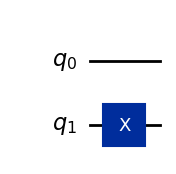

In [30]:
# 1. State preparation

psi0 = QuantumCircuit(2)
psi0.x(1)

psi0.draw('mpl')

2. time evolution using
\begin{align}
    \hat{U}(t) = A (C_1 X_0) e^{-it\mathbb{1}\otimes Z}(C_1X_0) A
    ^\dagger
    = A (C_1 X_0) (\mathbb{1}\otimes R_z(2t))(C_1X_0) A
    ^\dagger
\end{align}
with the unitary operator
\begin{align}
    A \equiv H\otimes SH.
\end{align}

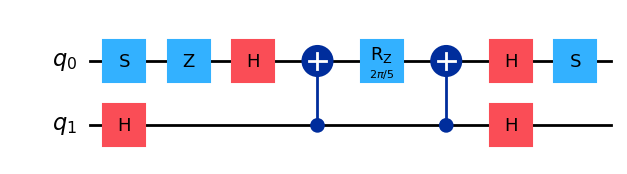

In [31]:
# 2. Time evolution

t = np.pi/5

ut = QuantumCircuit(2)

# A^\dagger = H \otimes H S^\dagger = H Z S
ut.h(1)
ut.s(0)
ut.z(0)
ut.h(0)

ut.cx(1, 0)
ut.rz(2*t, 0)
ut.cx(1, 0)

# A = H \otimes S H
ut.h(1)
ut.h(0)
ut.s(0)

ut.draw('mpl')

In [32]:
U_gate = Operator(ut).data
np.abs(U_gate - U(t)) > 1e-15

matrix([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

Measurement in the Bell basis is fulfilled by performing a "sandwiched" measurement in the computational basis between \( B \) and \( B^\dagger = (H \otimes \mathbb{1})(C_1 X_0) \). The outputs: $00, 01, 10, 11$ correspond to $|\phi^+\rangle, |\psi^+\rangle, |\phi^-\rangle$ and $|\psi^-\rangle$, respectively.

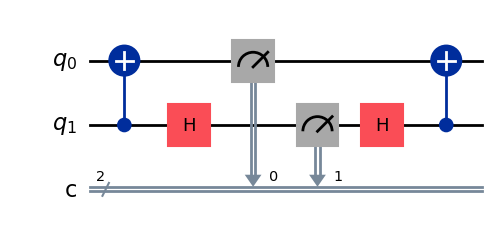

In [33]:
# 3. Measurement
qbits, cbits = QuantumRegister(2, 'q'), ClassicalRegister(2, 'c')

mea = QuantumCircuit(qbits, cbits)

# B^\dagger
mea.cx(1, 0)
mea.h(1)

mea.measure(qbits, cbits)

# B
mea.h(1)
mea.cx(1, 0)

mea.draw('mpl')

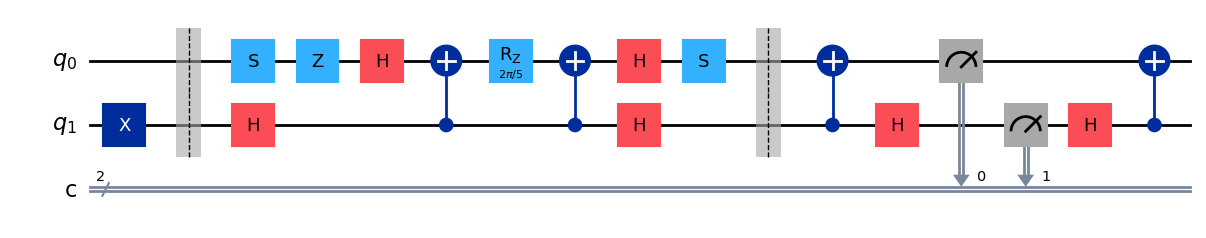

In [34]:
qc = psi0.copy()
qc.barrier()
qc = qc.compose(ut)
qc.barrier()
qc = qc.compose(mea)

cplot = qc.draw('mpl')
cplot

In [24]:
cplot.savefig('circuit_XY.pdf')

### Execute on simulator

In [35]:
from qiskit_ibm_runtime import Sampler, QiskitRuntimeService

In [36]:
ss = 5120
backend = BasicSimulator()
job_simulator = backend.run(transpile(qc), shots=ss)
result_simulator = job_simulator.result()

In [37]:
counts = result_simulator.get_counts()
print(counts)

{'01': 4993, '11': 127}


In [38]:
(1.0 - np.sin(2*t))/2.0, (1.0 + np.sin(2*t))/2.0

(0.024471741852423234, 0.9755282581475768)

In [39]:
maps = {'00': r'$|\phi^+\rangle$', '01': r'$|\psi^+\rangle$', '10': r'$|\phi^-\rangle$', '11': r'$|\psi^-\rangle$'}

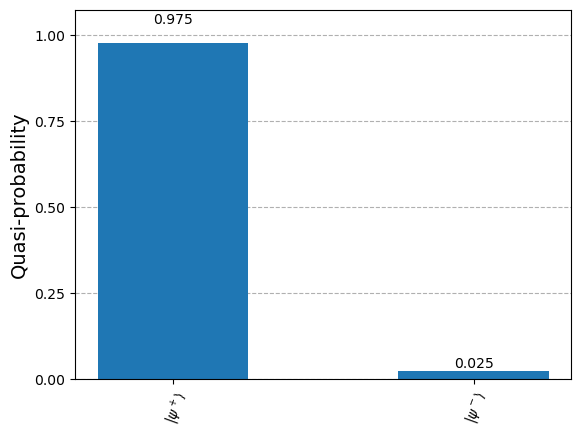

In [40]:
results = {}
for state in counts.keys():
    results[maps[state]] = counts[state]/ss
res = plot_histogram(results)
res

In [154]:
res.savefig('results_XY_simulator.pdf')

### Execute on Quantum backend

In [ ]:
QiskitRuntimeService.save_account(
    token='9cabcfcc5e97e81690870dec6da2366416e2529ba0207644ce0380a587e4cd08564ff23336e3249849fe61800013a7b1c3ec7d29325a3e1f24c447e8d0f94bc4',
    channel='ibm_quantum',
    overwrite=True
)

In [14]:
provider = QiskitRuntimeService()

In [15]:
provider.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

In [19]:
backend_QC = provider.backend('ibm_brisbane')
sampler_qc = Sampler(backend_QC)

In [20]:
pub = (transpile(qc, backend=backend_QC), None, ss)
job_QC = sampler_qc.run([pub])
result_QC = job_QC.result()

In [22]:
job_QC

<RuntimeJobV2('cy1bsc5rta1g0086p240', 'sampler')>

In [30]:
counts = result_QC[0].data['c'].get_counts()
counts

{'11': 205, '01': 4800, '00': 66, '10': 49}

In [28]:
maps = {'00': r'$|\phi^+\rangle$', '01': r'$|\psi^+\rangle$', '10': r'$|\phi^-\rangle$', '11': r'$|\psi^-\rangle$'}

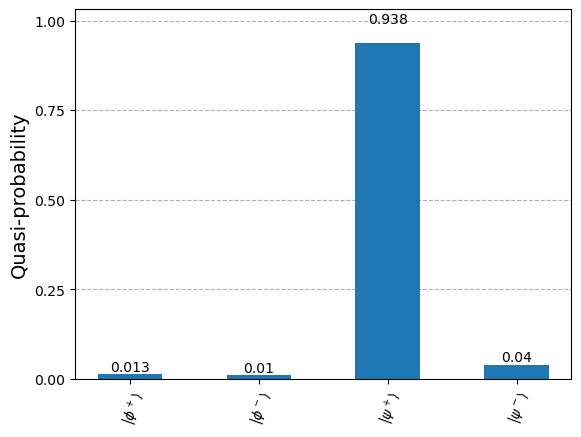

In [31]:
results = {}
for state in counts.keys():
    results[maps[state]] = counts[state]/ss
res = plot_histogram(results)
res

In [32]:
res.savefig('results_XY_ibm_brisbane.pdf')

### 2.2.2 Quantum Simulation Methods

In general, directly approximating the full evolution operator $\hat{U}(t)$ for the system is very difficult. Instead, the simulation is carried out by dividing the total time intervals $[0, t]$ into $n_t$ smaller time intervals with a time step $\Delta t = t / n_t$. The quantum state, encoded on the qubits, is then evolved iteratively through these time intervals using an approximate evolution operator constructed for each time step.

Compared to classical computers, quantum computers offer an exponential reduction in the memory required to represent both the quantum state and the evolution operator at each time step. However, as discussed in the previous section, preparing the initial quantum state and implementing the evolution operator as a quantum circuit can require an exponential number of CNOT gates, rendering the process intractable in general. The complexity can be further exacerbated by the fact that the **circuit depth**, defined as the number of sequential time steps during which gates are applied, also increases with the system size. Additionally, reconstructing the full information of $|\psi(t)\rangle$ generally requires $ O(2^n)$ projective measurements.  

Nonetheless, in many physical problems, simulations on quantum computers require only a polynomial number of operations in $n$, $t$, and $1/\epsilon$, where $\epsilon$ represents the desired precision. Such types of simulations are considered **efficient**. Among efficient quantum simulations, it is known that the optimal scaling for the simulation of dynamics cannot be sublinear in $t$; that is, there does not exist a constant $c < 1$ such that the computational cost is $O(t^c)$. This is known as the **no-fast-forwarding theorem** [ https://arxiv.org/abs/quant-ph/0508139 ][ https://www.rintonpress.com/journals/doi/QIC10.7-8-7.html ].

The main methods for quantum simulation include:

#### Trotterization
This widely-used technique simulates the time evolution of quantum systems governed by a Hamiltonian. It decomposes the Hamiltonian into smaller, simpler terms, each of which can be evolved independently. The evolution operator is then approximated by the product of these terms, with the approximation improving as the time step becomes smaller. This method relies on the *Trotter-Suzuki decomposition*, enabling the simulation of complex quantum dynamics with controlled error margins. It is especially effective for systems where interactions can be separated into non-commuting parts.

#### Taylor Series
This approach expands the time evolution operator as a power series, approximating the evolution of a quantum system over a small time interval. The Taylor series expansion is often used when the time step is small, providing accurate approximations. It is frequently combined with other methods, such as Trotterization, to improve the precision of quantum simulations. The accuracy of this method depends on the order of the expansion, with higher-order terms providing better approximations at the expense of increased computational complexity.

#### Qubitization
This method converts the simulation of continuous-time Hamiltonians into a discrete process that operates on a qubit register. It facilitates the efficient simulation of Hamiltonian dynamics using a limited number of quantum gates, making it particularly suitable for quantum computers with a finite number of qubits. Qubitization typically involves decomposing the Hamiltonian into a sum of simple, diagonal terms and applying efficient quantum gates to simulate the effect of these terms on a quantum state. This method is particularly advantageous for simulating large-scale quantum systems, as it reduces the computational cost compared to direct simulation.
